Materia: Ciencia de Datos\
Alumno: Francisco López Tancredi\
Padrón: 110464\
Fecha de Entrega: 19-06-2025

# **Parte 1:** Análisis Exploratorio

Esta sección tiene como objetivo el análisis exploratorio de los datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_train.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1
1,55,M,ATA,110,214,1,ST,180,N,0.4,Up,0
2,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1
3,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat,1
4,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1


In [3]:
df['HeartDisease_label'] = df['HeartDisease'].map({0: 'Sin Enfermedad', 1: 'Con Enfermedad'})
df['FastingBS_label'] = df['FastingBS'].map({0: '≤120 mg/dL', 1: '>120 mg/dL'})

---

# **PARTE UNO: Análisis Exploratorio**

## 1.1 **Bar plot**

Esta sección recopila los distintos análisis llevados a cabo sobre el set de datos que eligieron visualizarse con un **bar plot**. Esta elección se debe a que con este tipo de gráfico se puede visualizar cómo ciertas variables categóricas se relacionan con la presencia de enfermedad cardíaca (`HeartDisease`).

El objetivo de este análisis es ver a simple vista si existen patrones claros que puedan utilizarse para detectar la presencia de una enfermedad cardíaca. Las preguntas que guían el análisis son cuatro:

1. ¿Qué tipo de dolor torácico está más asociado a enfermedad cardíaca?
2. ¿Cómo influye la angina inducida por el ejercicio?
3. ¿Qué información aporta la pendiente del segmento ST en un electrocardiograma?
4. ¿El nivel de azúcar en ayunas condiciona el riesgo?

Para responderlas, se graficará cada una de estas en función de la proporción de `HeartDisease = 1` y a partir de estos gráficos se harán observaciones.

Antes de graficar, se comenta el porqué de las elecciones para investigar:

- `ChestPainType`: al hablar de enfermedades cardíacas, el tipo de dolor torácico es un síntoma clave.
- `ExerciseAngina`: la angina inducida por el ejercicio, es decir, al hacer esfuerzo, es un fuerte indicador de riesgo.
- `ST_Slope`: las alteraciones del segmento ST pueden ser indicativas de problemas cardíacos. Se espera que, en casos normales, sea ligeramente ascendente.
- `FastingBS`: el nivel de azúcar en sangre en ayunas puede proporcionar información acerca de la salud cardíaca del paciente.

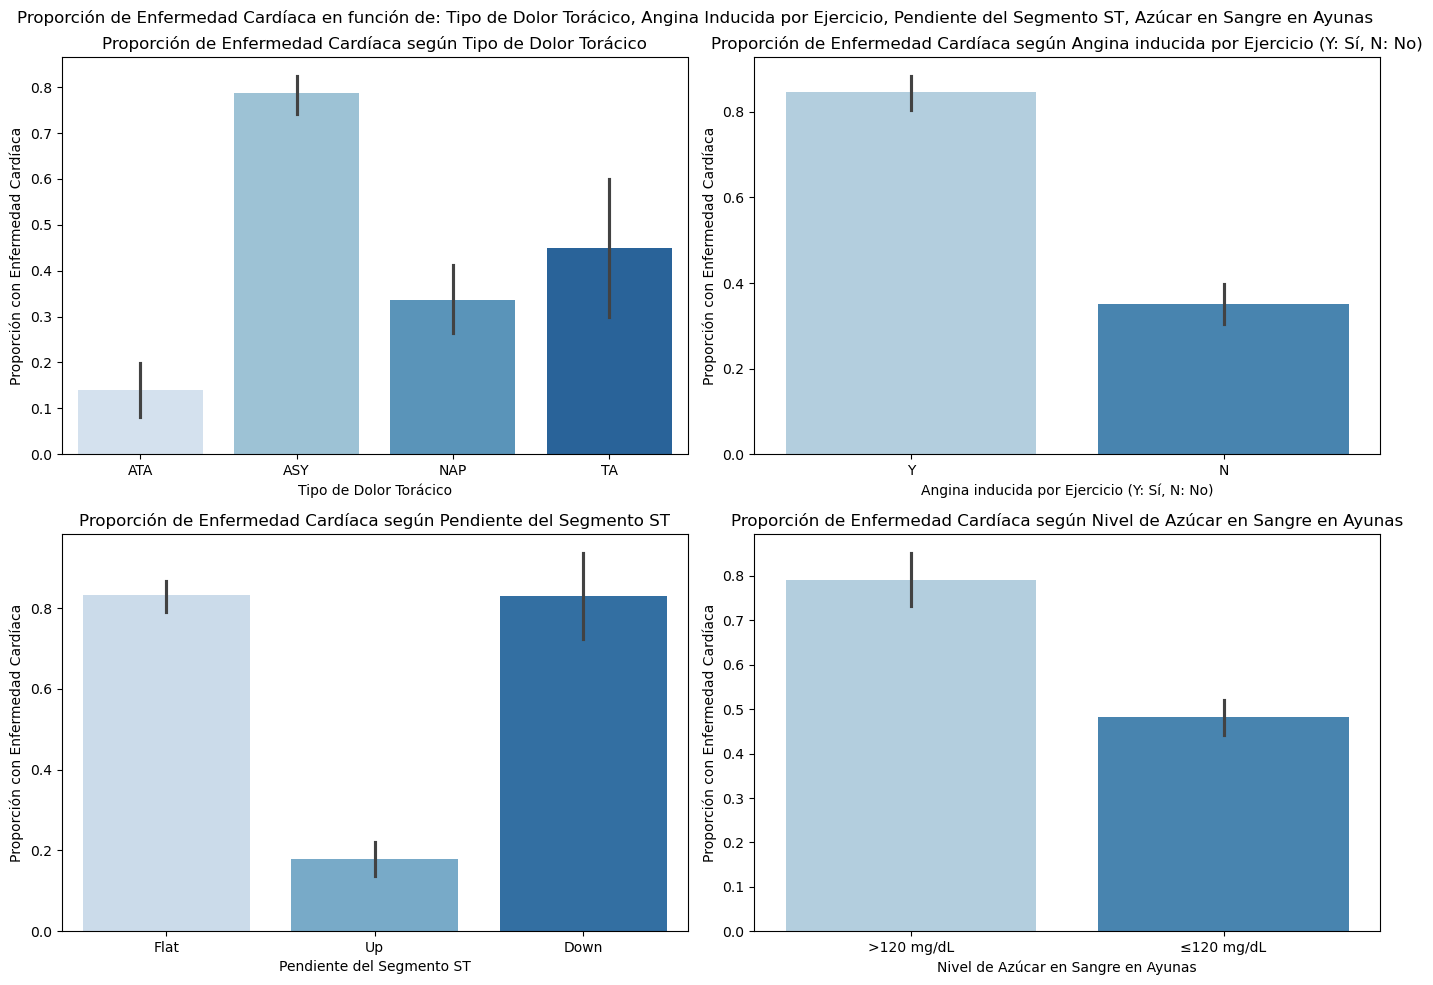

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
palette = 'Blues'

columns = [['ChestPainType', 'ExerciseAngina'],
           ['ST_Slope', 'FastingBS_label']]
titles = [['Tipo de Dolor Torácico', 'Angina inducida por Ejercicio (Y: Sí, N: No)'],
          ['Pendiente del Segmento ST', 'Nivel de Azúcar en Sangre en Ayunas']]

for i in range(0, 2):
    for j in range(0, 2):
        sns.barplot(x=columns[i][j], y='HeartDisease', data=df, hue=columns[i][j],
                    estimator=np.mean, palette=palette, ax=axes[i, j])

        axes[i, j].set(title=f'Proporción de Enfermedad Cardíaca según {titles[i][j]}',
                       xlabel=titles[i][j], ylabel='Proporción con Enfermedad Cardíaca')


plt.suptitle('Proporción de Enfermedad Cardíaca en función de: Tipo de Dolor Torácico, Angina Inducida por Ejercicio, Pendiente del Segmento ST, Azúcar en Sangre en Ayunas')
plt.tight_layout()
plt.show()

A continuación se hacen observaciones sobre los gráficos anteriores:

- **Tipo de Dolor Torácico:**
    - Las personas asintomáticas (**ASY**) muestran la proporción más alta de enfermedad (casi un 80%).
    - El dolor típico (**TA**) presenta un riesgo medio (debajo del 50%).
    - El dolor no anginoso (**NAP**) tiene asociado un ~35% de casos con enfermedades cardíacas.
    - El dolor atípico (**ATA**) casi no se asocia con el target, siendo el tipo de dolor torácico menos indicativo.

- **Angina inducida por Ejercicio:**
    - El 85% de los casos que sí experimentan angina al hacer esfuerzo físico tienen una enfermedad cardíaca.
    - Solamente el 35% de quienes no la experimentan tienen una enfermedad cardíaca, por lo que la ausencia de angina al realizar esfuerzo no descarta por completo el riesgo, pero sí lo reduce.

- **Pendiente del segmento ST:**
    - Una pendiente positiva es la menos indicativa de enfermedad cardíaca, asociándose con menos del 20% de los casos.
    - Una pendiente constante o negativa se asocia a un alto riesgo de enfermedad cardíaca, estando cada una arriba del 80%.

- **Nivel de Azúcar en Ayunas:**
    - Con un nivel mayor a 120 mg/dL, el riesgo de enfermedad cardíaca se encuentra en casi un 80%.
    - Con un nivel menor o igual a 120 mg/dL, cae a 48%, lo cual indica que estar en un rango normal mitiga el riesgo pero no lo elimina.

## 1.2 **Violin plot**

En esta sección se busca comparar la distribución de variables continuas entre pacientes con y sin enfermedades cardíacas. Se elige utilizar **violin plots** en este caso, ya que estos gráficos similares a los boxplots permiten visualizar la distribución de la densidad de los datos en cada rango.

Las variables de interés son las siguientes:
- **Edad (`Age`):** ver si la edad se agrupa de forma distinta según el estado cardíaco. Se espera que a mayor edad, mayor riesgo de enfermedad cardíaca.
- **Depresión del Segmento ST (`Oldpeak`):** esto mide la depresión del segmento ST inducida por el ejercicio con respecto al reposo.
- **Frecuencia cardíaca máxima alcanzada (`MaxHR`):** alteraciones en el ritmo cardíaco podrían ser indicativos de una enfermedad.
- **Nivel de Colesterol (`Cholesterol`):** se quiere comparar la distribución de colesterol en gente sana y en gente con enfermedad cardíaca.

In [6]:
df[df.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDisease_label,FastingBS_label
3,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat,1,Con Enfermedad,≤120 mg/dL
4,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,Con Enfermedad,>120 mg/dL
6,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat,1,Con Enfermedad,≤120 mg/dL
10,59,M,ASY,120,0,0,Normal,115,N,0.0,Flat,1,Con Enfermedad,≤120 mg/dL
12,61,M,ASY,134,0,1,ST,86,N,1.5,Flat,1,Con Enfermedad,>120 mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,64,M,ASY,120,0,1,ST,106,N,2.0,Flat,1,Con Enfermedad,>120 mg/dL
704,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0,Sin Enfermedad,≤120 mg/dL
712,38,M,ASY,135,0,1,Normal,150,N,0.0,Flat,1,Con Enfermedad,>120 mg/dL
718,38,M,ASY,150,0,1,Normal,120,Y,0.7,Flat,1,Con Enfermedad,>120 mg/dL


Debido a la presencia de casos con valor 0 en la columna de colesterol, y dado que este valor no es fisiológicamente posible, no se grafican estos datos para el gráfico de colesterol.

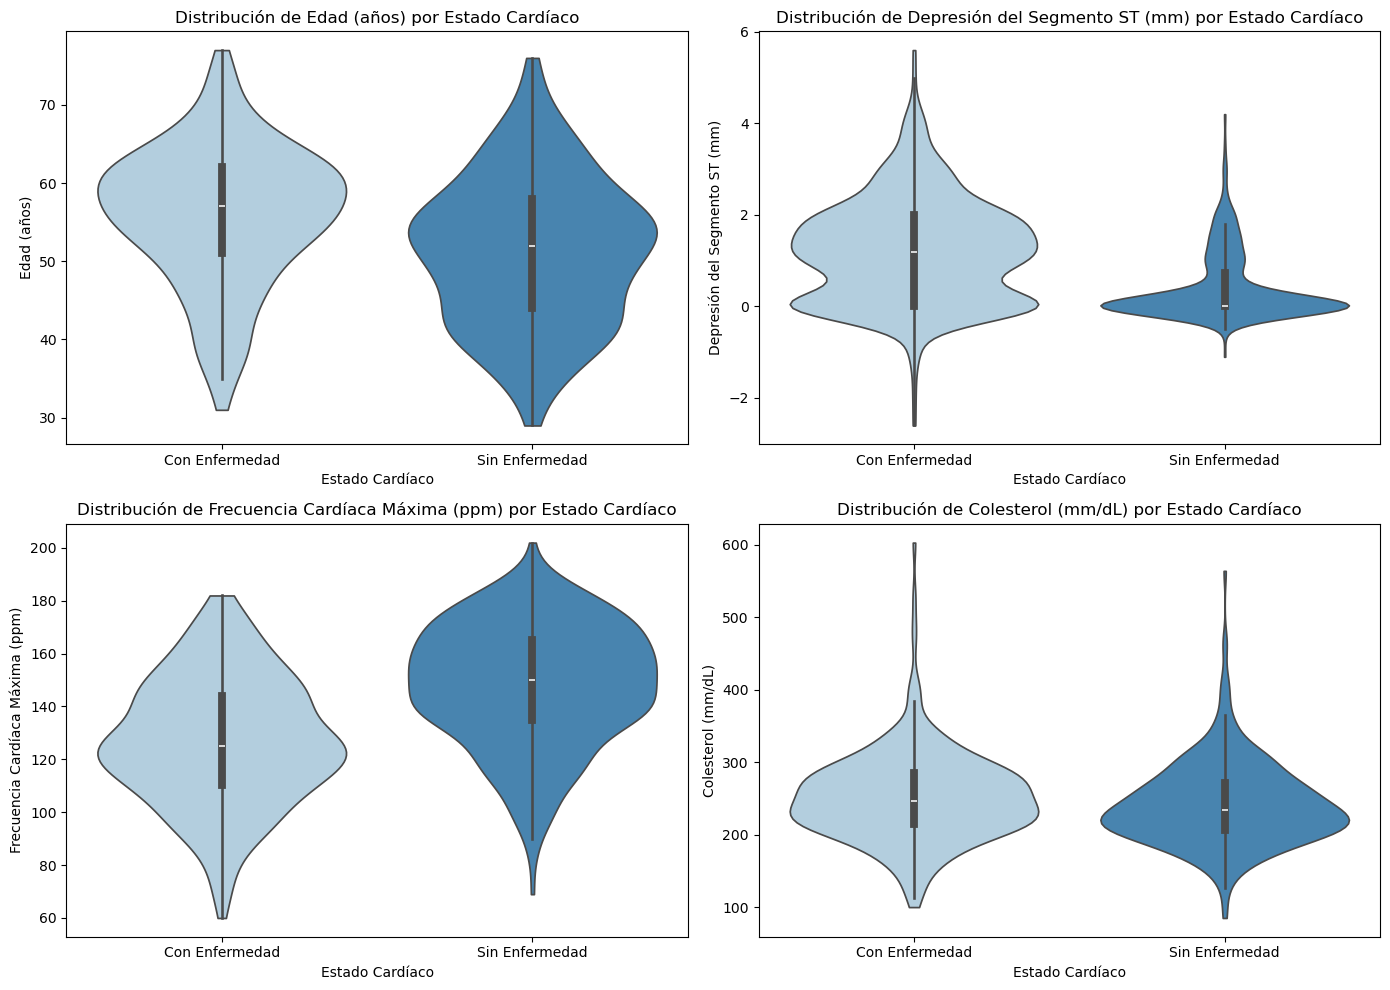

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = [['Age', 'Oldpeak'], ['MaxHR', 'Cholesterol']]
titles = [['Edad (años)', 'Depresión del Segmento ST (mm)'], ['Frecuencia Cardíaca Máxima (ppm)', 'Colesterol (mm/dL)']]

for i in range(0, 2):
    for j in range(0, 2):
        sns.violinplot(y=columns[i][j], x='HeartDisease_label', data=df[(df.Cholesterol != 0) | ((i, j) != (1, 1))], hue='HeartDisease_label',
                       palette=palette, ax=axes[i, j], cut=0)

        axes[i, j].set(title=f'Distribución de {titles[i][j]} por Estado Cardíaco',
                       ylabel=titles[i][j], xlabel='Estado Cardíaco')

plt.tight_layout()
plt.show()

- **Edad (`Age`):**
    - El grupo con enfermedad se concentra entre los 50 y los 65 años, con pico de densidad alrededor de los 60 años. Hay pocos casos debajo de los 40 años.
    - El grupo sin enfermedad abarca un rango más amplio.
- **Depresión del segmento ST (`Oldpeak`):**
    - Para el grupo con enfermedad la depresión del segmento ST es mucho más marcada, marcando una pendiente más pronunciada.
    - Para pacientes sin enfermedad, se observa una ausencia casi total de depresión ST.
- **Frecuencia cardíaca máxima (`MaxHR`):**
    - La distribución se concentra en rangos mucho más bajos para pacientes con enfermedad, aproximadamente entre 110 y 140 ppm, con pico de densidad en 120 ppm.
    - Para casos sin enfermedad, estos valores se concentran entre 140 y 180 ppm, con pico entre 140 y 160 ppm.
- **Colesterol (`Cholesterol`):**
    - En casos con enfermedad, la densidad se concentra entre 220-280 mg/dL, con una cola que alcanza casi los 400 mg/dL.
    - En casos sin enfermedad, la distribución es más compacta, concentrada alrededor de los 230 mg/dL, y con una cola menos pronunciada.

## 1.3 **Box plot**

En esta sección se usará el **boxplot** como herramienta para visualizar y comparar la distribución de algunas variables del dataset entre diversas categorías y agrupadas de acuerdo al estado cardíaco (con o sin enfermedad).

Los atributos que son de interes y se eligen para graficar son los siguientes:
- Depresión del ST en esfuerzo según pendiente ST.
- Edad según tipo de dolor torácico.
- Presión arterial en reposo según angina inducida por ejercicio.
- Nivel de Colesterol según ECG en reposo.

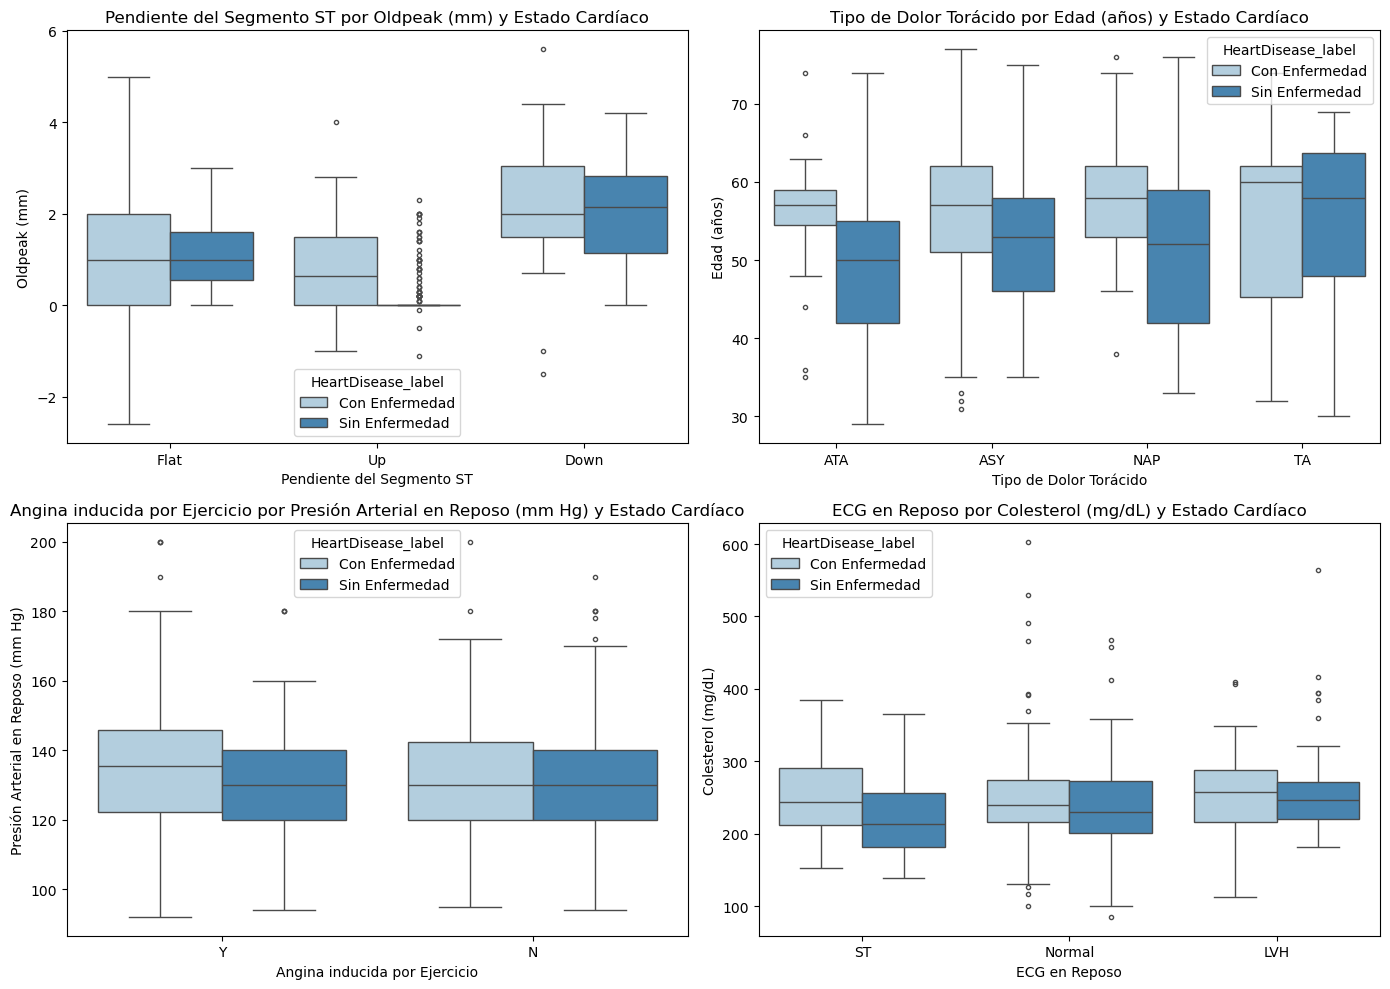

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = [[['ST_Slope', 'Oldpeak'], ['ChestPainType', 'Age']], [['ExerciseAngina', 'RestingBP'], ['RestingECG', 'Cholesterol']]]
titles = [[['Pendiente del Segmento ST', 'Oldpeak (mm)'],
           ['Tipo de Dolor Torácido', 'Edad (años)']], [
           ['Angina inducida por Ejercicio', 'Presión Arterial en Reposo (mm Hg)'],
           ['ECG en Reposo', 'Colesterol (mg/dL)']]]

for i in range(0, 2):
    for j in range(0, 2):
        x, y = columns[i][j]
        sns.boxplot(x=x, y=y, hue='HeartDisease_label', data=df[(df.Cholesterol != 0) | ((i, j) != (1, 1))],
                    palette=palette, ax=axes[i, j], fliersize=3)

        xlabel, ylabel = titles[i][j]
        axes[i, j].set(title=f'{xlabel} por {ylabel} y Estado Cardíaco',
                       xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.show()

## 1.4 **Heat map**

En esta sección se hace el cruce entre atributos categóricos del dataset para determinar si existen combinaciones que sirvan de indicador de enfermedad cardíaca, utilizando un **heatmap** para visualizar los cruces, mostrando, para cada combinación, la cantidad de filas del dataset que caen en esa categoría y la proporción de ellas que corresponden a una Enfermedad Cardíaca.

Se hacen los siguientes cruces, donde en cada caso está presente una tercer variable (el color) que indica la proporción que cumple `HeartDisease = 1`:
- **Nivel de Azúcar en Sangre en Ayunas vs ECG en Reposo**.
- **Tipo de Dolor Torácico vs Angina inducida por Ejercicio**
- **ECG en Reposo vs Pendiente del Segmento ST**
- **Nivel de Azúcar en Sangre en Ayunas vs Angina inducida por Ejercicio**.

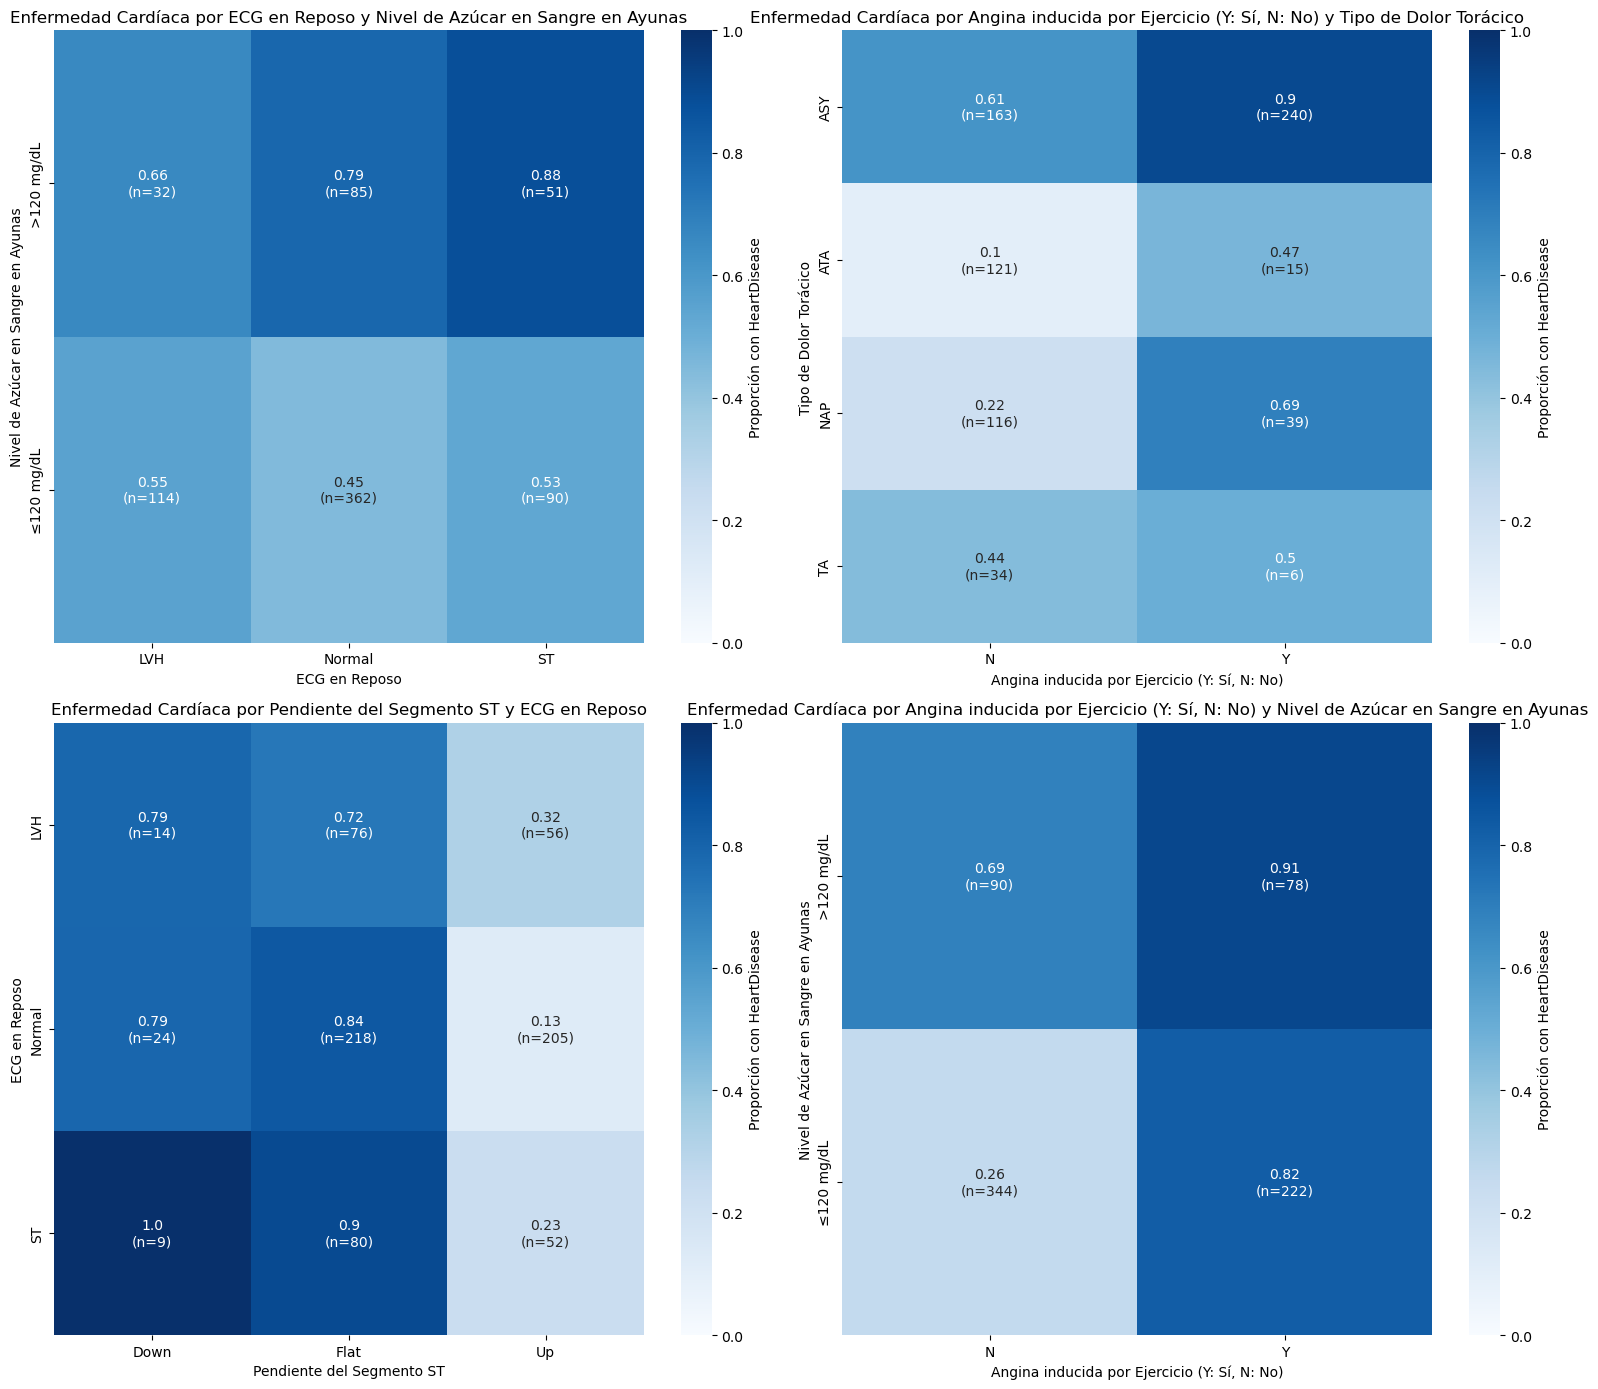

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

columns = [['FastingBS_label', 'RestingECG'], ['ChestPainType', 'ExerciseAngina'], ['RestingECG', 'ST_Slope'], ['FastingBS_label', 'ExerciseAngina']]
titles = [['Nivel de Azúcar en Sangre en Ayunas', 'ECG en Reposo'], ['Tipo de Dolor Torácico', 'Angina inducida por Ejercicio (Y: Sí, N: No)'],
 ['ECG en Reposo', 'Pendiente del Segmento ST'], ['Nivel de Azúcar en Sangre en Ayunas', 'Angina inducida por Ejercicio (Y: Sí, N: No)']]

for i in range(0, 2):
    for j in range(0, 2):
        cols = columns.pop(0)
        pivot_mean = df.groupby(cols)['HeartDisease'].mean().unstack()
        pivot_count = df.groupby(cols)['HeartDisease'].count().unstack()
        annot = pivot_mean.round(2).astype(str) + "\n(n=" + pivot_count.astype(str) + ")"
        sns.heatmap(data=pivot_mean, annot=annot, fmt="", cmap='Blues',
                    cbar_kws={'label': 'Proporción con HeartDisease'}, ax=axes[i, j],
                    vmin=0.0, vmax=1.0)

        ylabel, xlabel = titles.pop(0)
        axes[i, j].set(title=f'Enfermedad Cardíaca por {xlabel} y {ylabel}',
                       xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.show()

## 1.5 **Scatter plot**

En esta sección se explora la interacción entre dos atributos clave del set de datos:
- La **edad** (`Age`), ya que se el envejecimiento trae un mayor riesgo de enfermedad cardíaca.
- La **frecuencia cardíaca máxima alcanzada** (`MaxHR`), ya que evalúa la capacidad máxima del corazón para responder ante el esfuerzo físico.

En primer lugar, se pensó en utilizar un scatterplot para graficar esta relación, pero se dicidió emplear un **hexplot**, ya que este agrupa los puntos del scatterplot tradicional en celdas hexagonales coloreadas según la proporción de pacientes con HeartDisease en cada hexágono.

Esto es útil ya que reduce el ruido de miles de puntos individuales y permite visualizar con más claridad patrones clave.

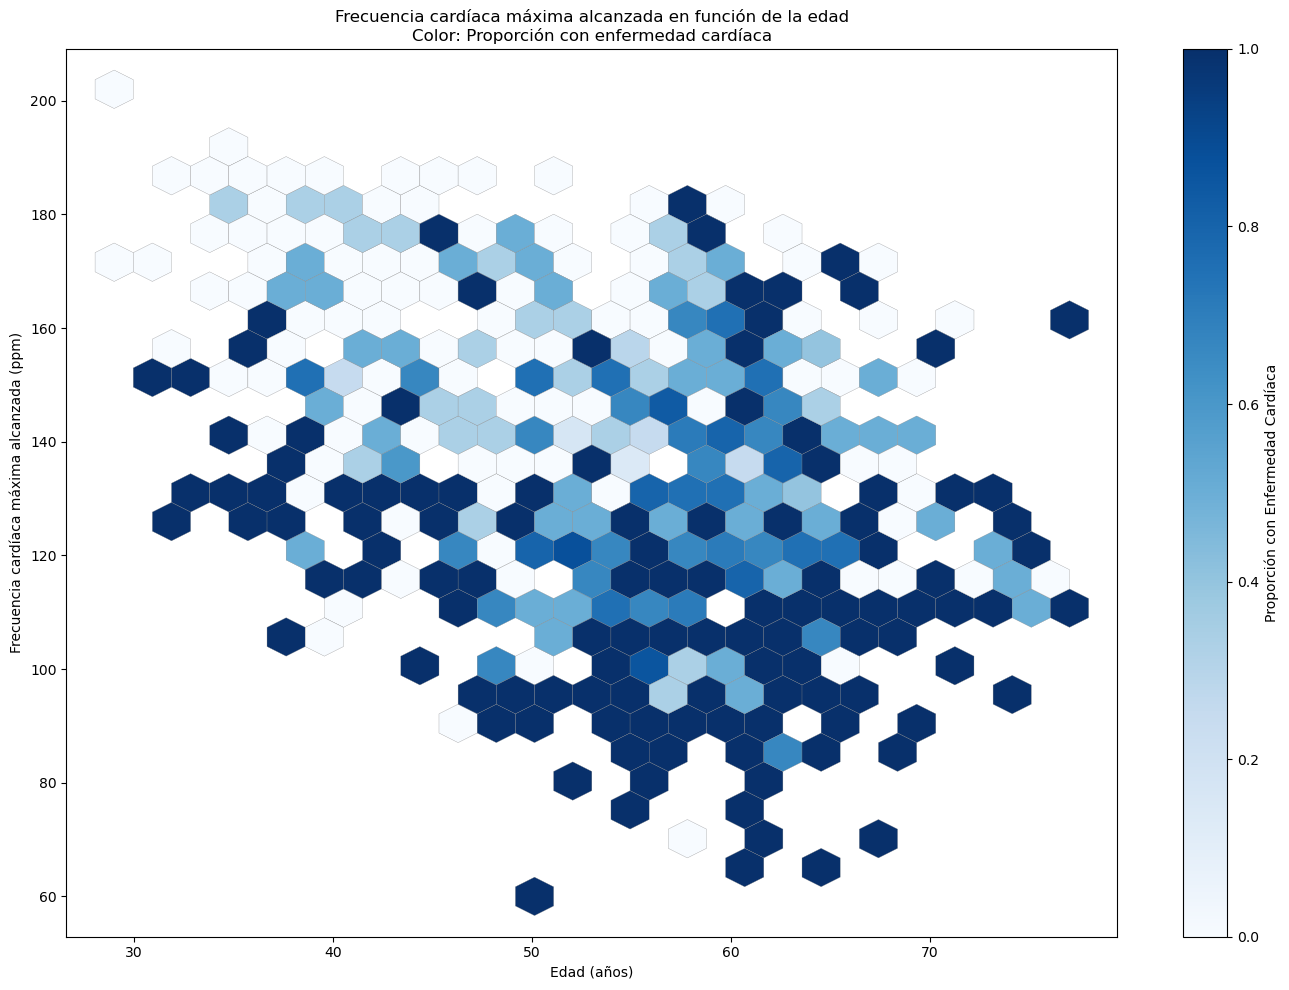

In [12]:
plt.figure(figsize=(14, 10))

hb = plt.hexbin(x=df['Age'], y=df['MaxHR'], C=df['HeartDisease'], edgecolor='gray', linewidth=0.2,
                reduce_C_function=np.mean, gridsize=25, cmap='Blues')

plt.colorbar(hb).set_label('Proporción con Enfermedad Cardíaca')
plt.gca().set(title='Frecuencia cardíaca máxima alcanzada en función de la edad\nColor: Proporción con enfermedad cardíaca',
              xlabel='Edad (años)', ylabel='Frecuencia cardíaca máxima alcanzada (ppm)')

plt.tight_layout()
plt.show()

Se realizan las siguientes observaciones:
- **Zonas de alto riesgo**  concentradas en edades altas (> 55) con frecuencias cardíacas máximas bajas (< 120 ppm).
- **Zonas de bajo riesgo** para edades bajas (< 45 años) con frecuencias cardíacas máximas altas (> 160 ppm).
- **Relación inversa** entre la edad y la frecuencia cardíaca máxima alcanzada.

## 1.6 **Histograma**

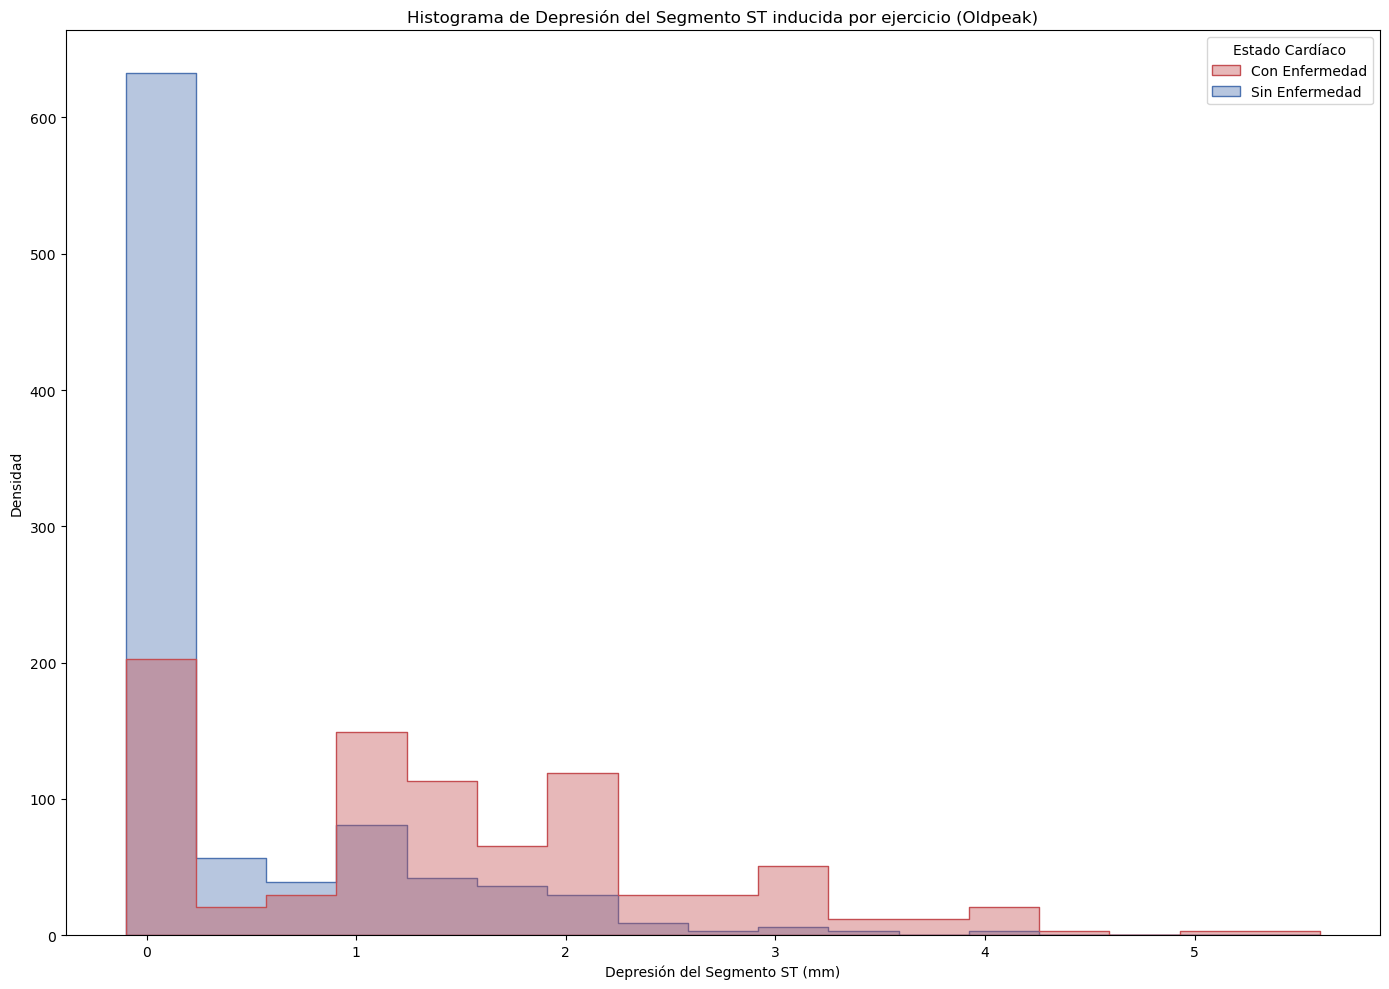

In [15]:
plt.figure(figsize=(14, 10))
ax = plt.gca()

sns.histplot(data=df[df.Cholesterol != 0], x='Oldpeak', stat='frequency',
             hue='HeartDisease_label', common_norm=False,
             element='step', palette=['#C44E52', '#4C72B0'], alpha=0.4)

ax.set(title='Histograma de Depresión del Segmento ST inducida por ejercicio (Oldpeak)',
       xlabel='Depresión del Segmento ST (mm)', ylabel='Densidad')
ax.get_legend().set_title(title='Estado Cardíaco')

plt.tight_layout()
plt.show()

A partir del gráfico, se realizan las siguientes observaciones:
- En el grupo sin enfermedad, la densidad se concentra en 0 mm, indicando que la amplia mayoría no presenta una depresión en el segmento ST al hacer ejercicio.
- El grupo con enfermedad muestra una densidad más homogénea entre 0 y 2 mm, e incluso mantiene una presencia significativa hasta valores de 4 mm.
- A mayor depresión del ST inducida por ejercicio, mayor probabilidad de enfermedad cardíaca.